# Problem Statement:
A key challenge for e-commerce businesses is to analyze the trend in the market to increase their sales. The trend can be easily observed if the companies can group the customers; based on their activity on the e-commerce site. This grouping can be done by applying different criteria like previous orders, mostly searched brands and so on. The machine learning clustering algorithms can provide an analytical method to cluster customers with similar interests.

# 1.Import Libraries

In [7]:
import pandas as pd 
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt


# 2.Set options

In [8]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

# 3.Read Data

In [9]:
data=pd.read_excel("E://data science//Projects//Customer Segmentation(K-Clustering)//Dataset//cust_data.xlsx")
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [10]:
data.shape

(30000, 38)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [13]:
df=data.copy()

# 4.Understand the data

### Check for data types

In [14]:
df.dtypes

Cust_ID                    int64
Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal    

In [15]:
#dropping customer id
df.drop(['Cust_ID'],axis=1, inplace=True)

###  Statistical Summary

In [16]:
#satst for numerical variables
df.describe()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,0.094267,0.140133,0.328200,0.209333,0.141467,0.161100,0.106100,0.300233,0.048067,0.754800,0.247900,0.470833,0.258000,0.118767,0.031967,0.428033,0.121333,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,0.531592,0.471278,0.807655,1.116820,0.529210,0.604835,0.516512,1.119167,0.338763,1.262166,0.724106,1.346159,0.848288,0.597612,0.264475,1.098876,0.478977,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


Orders columns is much spreaded than any other columns

In [17]:
#stats for categporical varoiables
df.describe(include='object')

,Gender
count,27276
unique,2
top,F
freq,22054


Categprical summary shows majority is feamle customers


### Distribution of variables

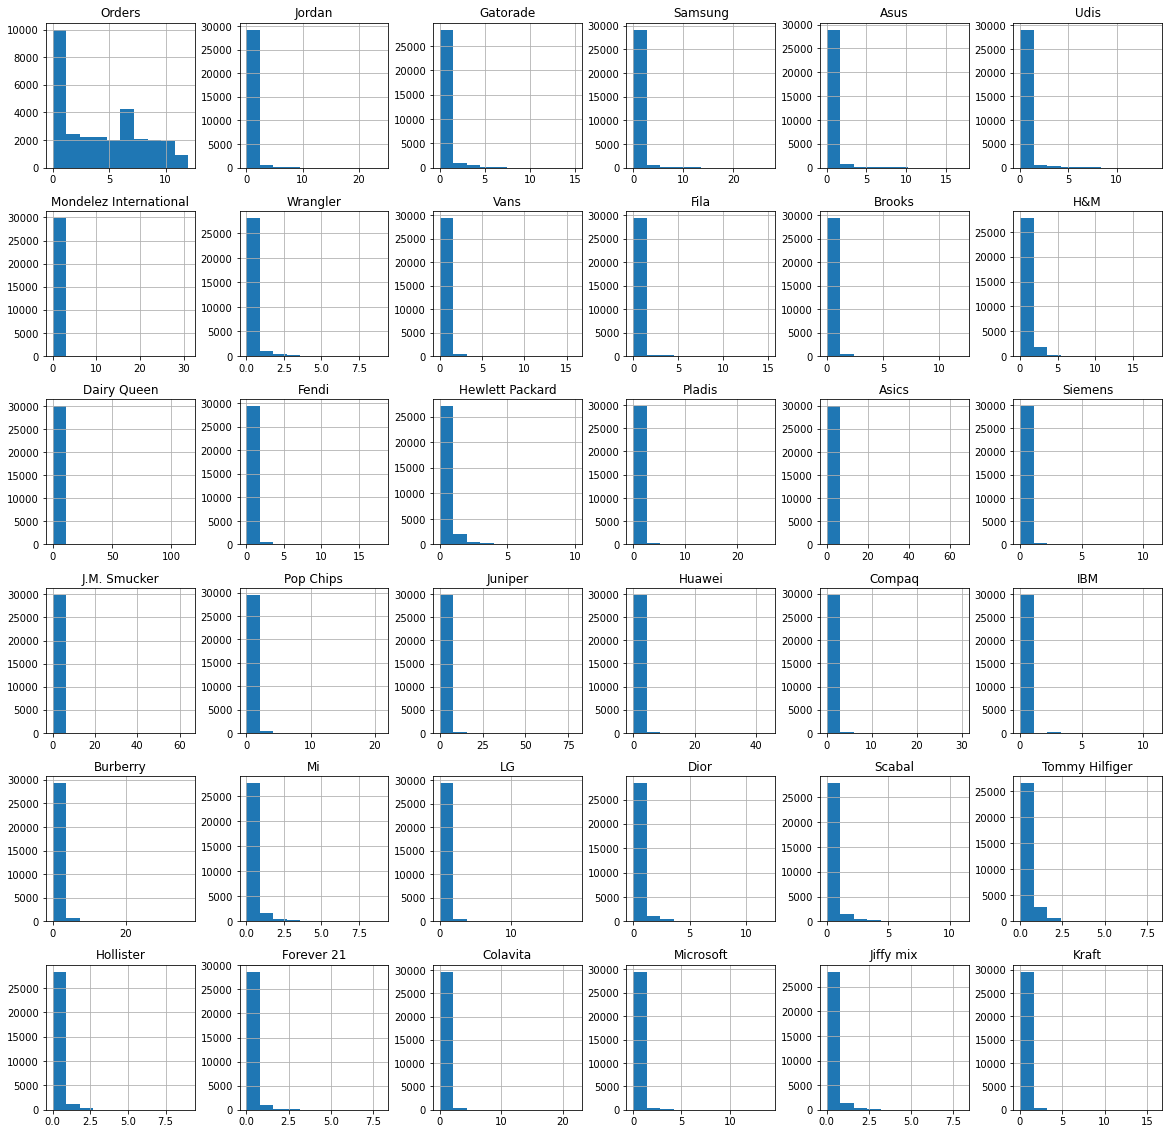

In [18]:
#Distributuin of numerical variables

df.hist(figsize=(20,20))
plt.show()

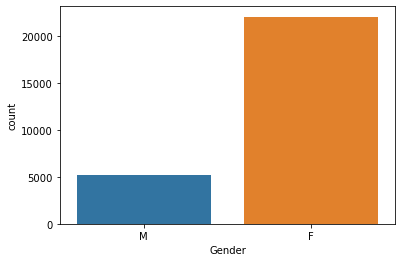

In [19]:
#Distribution of males and females

sns.countplot(data['Gender'])

We can clearly observe most of the customers are females

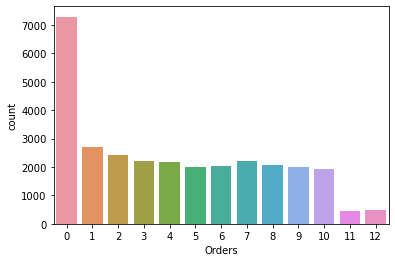

In [20]:
#Distribution of orders

sns.countplot(data['Orders'])

We can observe most of the orders are i.e window shopping

### Missing value treatment


In [21]:
df.isnull().sum()

Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Hollister                    0
Forever 

    As gender has only 2 unique variables and there is some missing values also which suggest unknown Gender.Thus we can do one hot encoding for gender creating two columns Gender_M and Gender_F. The customer with Gender_M and Gender_F is 0 will implies gender is unknown

In [22]:
#ectracting numerical and categorical variables
numerical=df.select_dtypes(include=np.number)
categorical=df.select_dtypes(include="object")

#dummy_encoding categorical variables
dummy_encode=pd.get_dummies(categorical)

#concating the dummy_encoded and numerical 
dummy_data=pd.concat([numerical, dummy_encode], axis=1)
dummy_data.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
0,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,1,0
2,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,0,0


In [23]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Orders                  30000 non-null  int64
 1   Jordan                  30000 non-null  int64
 2   Gatorade                30000 non-null  int64
 3   Samsung                 30000 non-null  int64
 4   Asus                    30000 non-null  int64
 5   Udis                    30000 non-null  int64
 6   Mondelez International  30000 non-null  int64
 7   Wrangler                30000 non-null  int64
 8   Vans                    30000 non-null  int64
 9   Fila                    30000 non-null  int64
 10  Brooks                  30000 non-null  int64
 11  H&M                     30000 non-null  int64
 12  Dairy Queen             30000 non-null  int64
 13  Fendi                   30000 non-null  int64
 14  Hewlett Packard         30000 non-null  int64
 15  Pladis             

# 5.Prepare the data

In [24]:
#considering only brand names as features
features=dummy_data.drop(['Gender_M','Gender_F','Orders'], axis=1)
features.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [25]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
features=standard.fit_transform(features)
features

array([[-0.33231249, -0.35773869, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-0.33231249,  1.05998399, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-0.33231249,  1.05998399, -0.24298472, ...,  1.97870833,
        -0.22048554, -0.18277495],
       ...,
       [-0.33231249,  1.05998399, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-0.33231249, -0.35773869, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [ 2.15288625, -0.35773869, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495]])

In [26]:
feature_scaled=pd.DataFrame(features)
feature_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,0.831805,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,0.986574,2.419713,0.393100,-0.304147,-0.198739,-0.12087,5.070692,8.097945,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,-0.187440,-0.267321,-0.266358,-0.205420,1.518804,-0.141891,0.194272,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,0.831805,-0.187440,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,1.038677,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,0.707974,-0.267321,-0.266358,9.475052,0.625267,-0.141891,1.778876,-0.342359,0.393100,-0.304147,-0.198739,-0.12087,0.520510,-0.253322,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


# K-Means Clustering

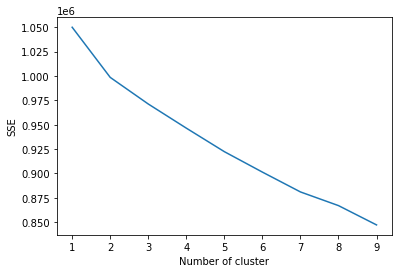

In [28]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(feature_scaled)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [27]:
#Build multiple models with multiple K and select the best parameters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_cluster=[3,4,5,6]
for k in n_cluster:
    model=KMeans(n_clusters=k, random_state=10)
    predict= model.fit_predict(feature_scaled)
    score=silhouette_score(feature_scaled, predict, random_state=10)
    print(f"For {k} cluster silhouette score is {score}")
    
    

For 3 cluster silhouette score is 0.29026216981969477
For 4 cluster silhouette score is 0.28882936660509695
For 5 cluster silhouette score is 0.2734507732644251
For 6 cluster silhouette score is 0.21945733520583072


In [ ]:
#Build the k model for k =3

model=KMeans(n_clusters=3, random_state=10)
model.fit(feature_scaled)

# Retrieve the cluster

In [6]:
data['Cluster']=model.labels_
data.head()

NameError: name 'model' is not defined

In [ ]:
#size of the cluster

np.unique(model.labels_, return_counts=True)


In [ ]:
sns.countplot(data=data, x="Cluster")

We can observe that second cluster have largest among 3

#### Cluster center

In [ ]:
center=pd.DataFrame(model.cluster_centers_, columns=data.columns[2:37])
center

# Cluster Analysis

In [ ]:
cluster_1=sorted(zip(center.iloc[0,:], list(center.columns)[2:37]), reverse=True)
cluster_1[:10]

In [ ]:
cluster_2=sorted(zip(center.iloc[1, :], list(center.columns)[2:37]), reverse=True)
cluster_2[:10]

In [ ]:
cluster_3=sorted(zip(center.iloc[2,:], list(center.columns)[2:37]), reverse=True)
cluster_3[:10]

###  Analysis of cluster 1


In [ ]:
#size of the cluster_1
np.unique(model.labels_, return_counts=True)[1][0]

In [ ]:
# variables belongs to the cluster
cluster1_df=pd.DataFrame(cluster_1)[1][:10]
cluster1_df

cluster_1 will be a basket shopping

### Analyze of cluster_2

In [ ]:
#size of cluster_
np.unique(model.labels_, return_counts=True)[1][1]

In [ ]:
cluster2_df=pd.DataFrame(cluster_2)[1][:10]
cluster2_df

cluster_2 will be a Electronic devices

### Analyze of cluster_3

In [ ]:
np.unique(model.labels_, return_counts=True)[1][2]

In [ ]:
cluster3_df=pd.DataFrame(cluster_3)[1][:10]
cluster3_df

Cluster_3 will be fashion Apparals